## Hospital readmissions data analysis and recommendations for reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise overview

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

sns.set_style('white')

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[(hospital_read_df['Number of Discharges'] != 'Not Available')]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort('Number of Discharges')

/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


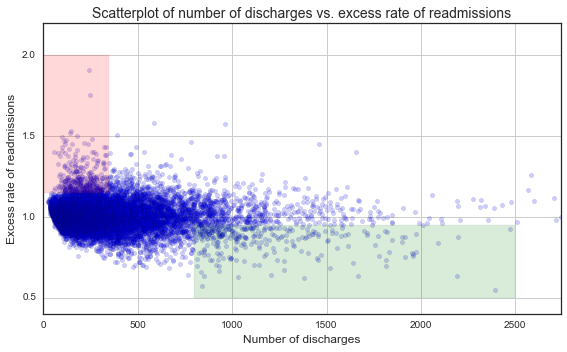

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary report

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****

## Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

### Part A

(0, 1.9095)

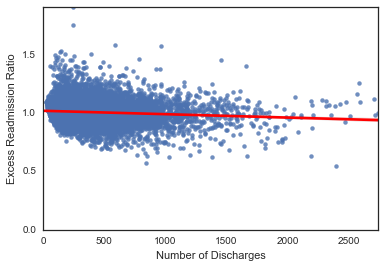

In [5]:
# A.1 I don't find that it trends down. 
# To me the line looks almost flat. There is also a 95% confidence interval surrounding, which is hardly seen.
sns.regplot(data=clean_hospital_read_df, x='Number of Discharges', y='Excess Readmission Ratio', line_kws={'color': 'red'})
plt.xlim([0, max(x)])
plt.ylim([0, max(y)])

In [6]:
# A.2 I based my conclusions on the red and green area as was stated.
# The red area has a readmission ratio of above 1.15 and less than 350 discharges.
# It's all around 5%, but the incidence rate of above 1.15 readmission ratio's is actually slightly lower below 350 discharges.

print('Above 1.15:\n')

incidence_overall = sum(clean_hospital_read_df['Excess Readmission Ratio'] > 1.15) / len(clean_hospital_read_df['Excess Readmission Ratio'])
incidence_lowdischarge = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]['Excess Readmission Ratio'] > 1.15) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]['Excess Readmission Ratio']))
incidence_highdischarge = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]['Excess Readmission Ratio'] > 1.15) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]['Excess Readmission Ratio']))

print('overall:', incidence_overall)
print('low:', incidence_lowdischarge)
print('high:', incidence_highdischarge)

Above 1.15:

overall: 0.0534634651926
low: 0.0494420115836
high: 0.0533926585095


In [7]:
# A.3 The green area has a readmission ratio of below 0.95 and more than 800 discharges.
# It went from overall 24% to 34% for the high nr of discharges. Hence here they are right with their statement.

print('Below 0.95:\n')

incidence_overall = sum(clean_hospital_read_df['Excess Readmission Ratio'] < 0.95) / len(clean_hospital_read_df['Excess Readmission Ratio'])
incidence_lowdischarge = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]['Excess Readmission Ratio'] < 0.95) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 350]['Excess Readmission Ratio']))
incidence_highdischarge = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]['Excess Readmission Ratio'] < 0.95) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 800]['Excess Readmission Ratio']))

print('overall:', incidence_overall)
print('low:', incidence_lowdischarge)
print('high:', incidence_highdischarge)

Below 0.95:

overall: 0.237433062705
low: 0.202147195932
high: 0.337041156841


In [8]:
# B.1 They are right about the readmission rate being 1.023. 
# They are wrong about the 63%. It's 59%.

mean = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'].mean()
percentage = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'] > 1) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] < 100]['Excess Readmission Ratio'])) * 100

print(mean)
print(percentage)

1.02261835017
59.1804570528


In [9]:
# B.2 They are right about both statements: mean 0.978 and 44% above 1.

mean = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'].mean()
percentage = (sum(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'] > 1) /
    len(clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 1000]['Excess Readmission Ratio'])) * 100

print(mean)
print(percentage)

0.978335421166
44.4924406048


In [10]:
# C.1 As mentioned before the line in the regression plot looks almost flat, so can't imagine that it's a big correlation. 
# They don't mention what the size of the correlation is. It could be that it's a very small correlation,
# but due to the huge sample size that it is significant, but a very small correlation is not very relevant.
# When I calculate the correlation, I get 'nan' since there are NAN values in the dataset!
# These rows should be excluded of any analysis. This goes also for everything above here.
from scipy.stats import pearsonr
pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

(nan, 1.0)

In [11]:
# C.2 Can't prove that with the data at hand. 
# So far I don't see any indication that there is a big significant correlation between hospital size and readmission ratio.

In [12]:
# D.1 & D.2 Since there is no evidence of a problem, new regulation are premature.

### Part B

In [13]:
# Hospitals/facilities with small capacity (<300) have a different readmission ratio.
# H0: They don't. H1: They have.
# Also check correlation.

In [14]:
# First we exclude everything with a NAN value
print(sum(clean_hospital_read_df['Excess Readmission Ratio'].isnull()))
print(clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio']).shape)
print(clean_hospital_read_df.shape)
hospital_df = clean_hospital_read_df.dropna(subset=['Excess Readmission Ratio'])

81
(11497, 12)
(11578, 12)


In [15]:
# Significantly different readmission ratio mean. Hence H0 rejected (easily below 0.01)
# But the difference is very very small.
# Effect-size is very important with these large datasets.

from scipy.stats import ttest_ind

print(ttest_ind(hospital_df[hospital_df['Number of Discharges'] < 300]['Excess Readmission Ratio'], 
          hospital_df[hospital_df['Number of Discharges'] >= 300]['Excess Readmission Ratio']))

print(hospital_df[hospital_df['Number of Discharges'] < 300]['Excess Readmission Ratio'].mean())
print(hospital_df[hospital_df['Number of Discharges'] >= 300]['Excess Readmission Ratio'].mean())

Ttest_indResult(statistic=8.384446244560591, pvalue=5.6895380893335379e-17)
1.01423821218
0.999870848024


In [16]:
# We see also a very significant correlation, but as I expected the value is only -0.097. 
# Usually we start speeking of an interesting correlation from 0.7 and above or -0.7 and below.
from scipy.stats import pearsonr
pearsonr(hospital_df['Number of Discharges'], hospital_df['Excess Readmission Ratio'])

(-0.097397943510793533, 1.222547377680967e-25)

In [17]:
# From the hypothesis and p-value we should conclude that the readmission ratio in hospital/facilities with small capacity is
# significantly different. Nevertheless, for the purpose of cutting their money and making them jump through hoops
# to defend that their quality is good enough the difference is way not enough. Due to the large dataset even
# really small values become significant. Even though they are not interesting for the purpose.
# Always check effectsize of the difference!